In [35]:
import pymc3 as pm
import numpy as np
import pandas as pd

# 가상의 데이터 생성
# data라는 DataFrame에 키, 몸무게, 체지방률 데이터가 있다고 가정
# 각 행(row)이 한 사람을 나타내도록 구성되어 있어야 함
data = pd.DataFrame({
    'HT': np.random.normal(loc=170, scale=5, size=1000),
    'WT': np.random.normal(loc=70, scale=10, size=1000),
    'PBF': np.random.normal(loc=20, scale=2, size=1000)
})

# 모델 생성
with pm.Model() as model:
    # 각 변수의 평균과 표준편차를 맞추기 위한 사전 분포 정의
    mean = pm.Uniform('mean', lower=150, upper=200, shape=3)  # 3개의 변수(키, 몸무게, 체지방률)에 대한 평균
    std = pm.Uniform('std', lower=1, upper=10, shape=3)       # 3개의 변수(키, 몸무게, 체지방률)에 대한 표준편차
    cov_matrix = np.array([[1.0, 0.5, 0.2],
                       [0.5, 2.0, 0.3],
                       [0.2, 0.3, 3.0]])

    # Multivariate Normal likelihood 모델 정의
    obs = pm.MvNormal('obs', mu=mean, cov=cov_matrix, observed=data)

    # MCMC 샘플링
    trace = pm.sample(1000, tune=1000)


/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [std, mean]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 106 seconds.


In [9]:
data

,HT,WT,PBF
0,163.964087,65.534092,21.065097
1,171.381377,77.129420,19.285059
2,159.276637,72.437312,20.109684
3,171.017987,57.055418,19.635997
4,170.422409,67.807081,18.887800
...,...,...,...
995,176.875577,76.865014,21.888864
996,171.731529,55.941505,20.913033
997,172.561950,61.413807,19.840877
998,167.289579,80.387490,20.126454


In [10]:
# (키, 몸무게, 체지방률)의 쌍으로 이루어진 데이터
data_pairs = data[['HT', 'WT', 'PBF']].values

# 공분산 행렬 계산
cov_matrix = np.cov(data_pairs, rowvar=False)

In [33]:
import pymc3 as pm
import numpy as np
import pandas as pd

# 데이터 생성 (생략)
data = pd.DataFrame({
    'HT': np.random.normal(loc=170, scale=10, size=10000),
    'WT': np.random.normal(loc=70, scale=5, size=10000),
    'PBF': np.random.normal(loc=20, scale=2, size=10000)
})

# 공분산 행렬 계산
data_pairs = data[['HT', 'WT', 'PBF']].values
cov_matrix = np.cov(data_pairs, rowvar=False)

# 평균을 설정

# 모델 생성
with pm.Model() as model:
    # 각 변수의 평균과 표준편차를 맞추기 위한 사전 분포 정의
    ht_mean = pm.Uniform('ht_mean', lower=50, upper=200)  # 키의 평균
    wt_mean = pm.Uniform('wt_mean', lower=10, upper=100)   # 몸무게의 평균
    pbf_mean = pm.Uniform('pbf_mean', lower=3, upper=40)  # 체지방률의 평균

    # (키, 몸무게, 체지방률)의 쌍을 다변량 정규 분포로 관측
    observed_data = data[['HT', 'WT', 'PBF']].values
    obs = pm.MvNormal('obs', mu=[ht_mean, wt_mean, pbf_mean], cov=cov_matrix, observed=observed_data)

# MCMC 샘플링
with model:
    trace = pm.sample(1000, tune=1000)


/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pbf_mean, wt_mean, ht_mean]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


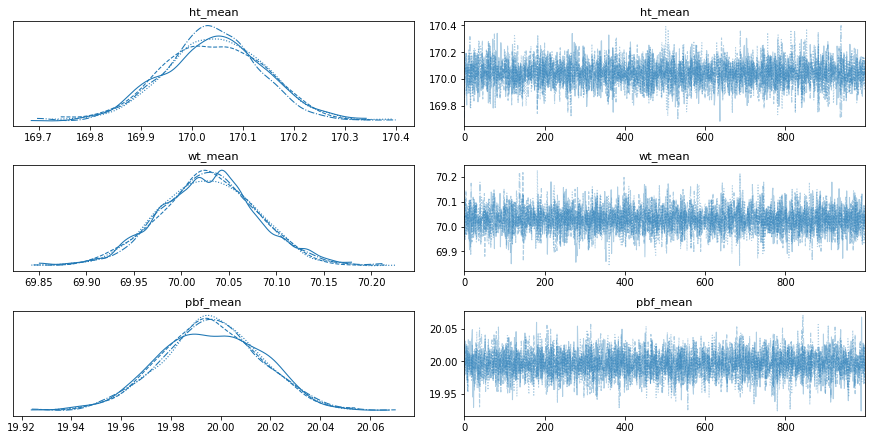

In [34]:
pm.traceplot(trace)
plt.show()

/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


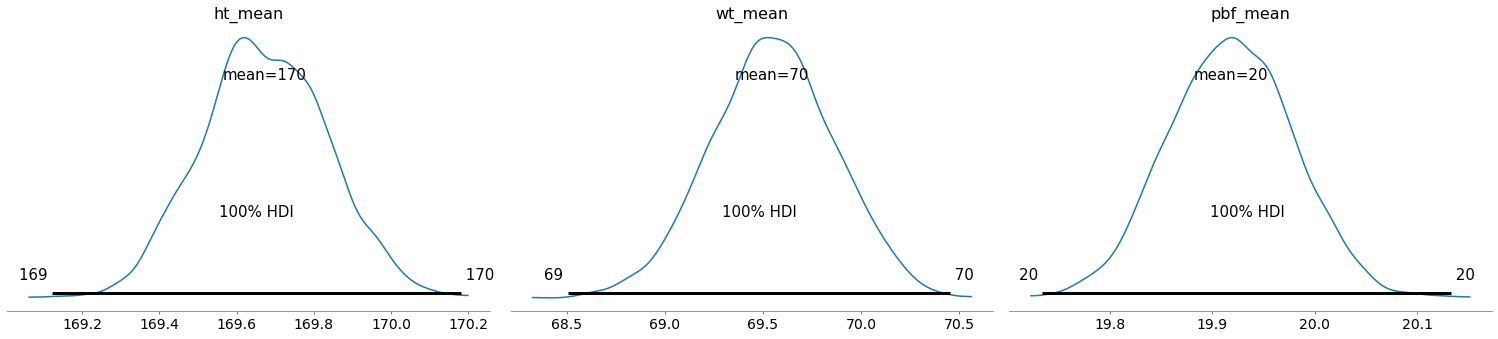

In [26]:
pm.plot_posterior(trace, hdi_prob=0.999)
plt.show()

In [24]:
print(pm.summary(trace))

/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


             mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
ht_mean   169.671  0.163  169.375  169.974      0.002    0.002    5874.0   
wt_mean    69.547  0.317   68.968   70.152      0.004    0.003    5281.0   
pbf_mean   19.918  0.061   19.806   20.032      0.001    0.001    4815.0   

          ess_sd  ess_bulk  ess_tail  r_hat  
ht_mean   5874.0    5881.0    3091.0    1.0  
wt_mean   5280.0    5252.0    3084.0    1.0  
pbf_mean  4812.0    4842.0    2382.0    1.0  


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
import scipy as sp

blue, green, red, purple, gold, teal = sns.color_palette()
SEED = 69972 # from random.org, for reproducibility
np.random.seed(SEED)

x_beta_binomial = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

import pymc3 as pm

with pm.Model() as beta_binomial_model:
    p_beta_binomial = pm.Uniform('p', 0., 1.)

with beta_binomial_model:
    x_obs = pm.Bernoulli('y', p_beta_binomial,
                         observed=x_beta_binomial)

# plot the true beta-binomial posterior distribution
fig, ax = plt.subplots()

prior = sp.stats.uniform(0, 1)
posterior = sp.stats.beta(1 + x_beta_binomial.sum(), 1 + (1 - x_beta_binomial).sum())

plot_x = np.linspace(0, 1, 100)
ax.plot(plot_x, prior.pdf(plot_x),
        '--', c='k', label='Prior');

ax.plot(plot_x, posterior.pdf(plot_x),
        c=blue, label='Posterior');

ax.set_xticks(np.linspace(0, 1, 5));
ax.set_xlabel(r'p');

ax.set_yticklabels([]);

ax.legend(loc=1);

In [44]:
import pymc3 as pm
import numpy as np
import pandas as pd

# 데이터 생성 (예시)
data = pd.DataFrame({
    'HT': np.random.normal(loc=170, scale=5, size=1000),
    'WT': np.random.normal(loc=70, scale=10, size=1000),
    'PBF': np.random.normal(loc=20, scale=2, size=1000)
})

# 모델 생성
with pm.Model() as model:
    # 공분산 행렬 계산
    cov_matrix = np.cov(data[['HT', 'WT', 'PBF']].values, rowvar=False)

    # (키, 몸무게, 체지방률)의 쌍을 다변량 정규 분포로 샘플링
    samples = pm.MvNormal('samples', mu=[170, 70, 20], cov=cov_matrix, shape=(3,))

    # 데이터와의 비교를 위해 likelihood 정의
    obs = pm.MvNormal('obs', mu=samples, cov=cov_matrix, observed=data[['HT', 'WT', 'PBF']].values)

    # 키 평균 160인 사람을 추론하기 위한 키의 평균 확률 변수를 정의
    ht_mean = pm.Normal('ht_mean', mu=160, sd=10)

    # MCMC 샘플링
    trace = pm.sample(1000, tune=1000)

# 결과 확인
print(trace['ht_mean'].mean())   # 평균 확인
print(trace['ht_mean'].std())    # 표준편차 확인


KeyboardInterrupt: 

In [3]:
df.mean()

키      168.8
몸무게     67.0
dtype: float64

In [21]:
import random

ht, wt = [],[]
for i in range(10000):
    ht.append(random.randint(140, 190))
    wt.append(random.randint(45, 90))

In [22]:
df.mean()

키      169.9257
몸무게     67.4927
dtype: float64

/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/back

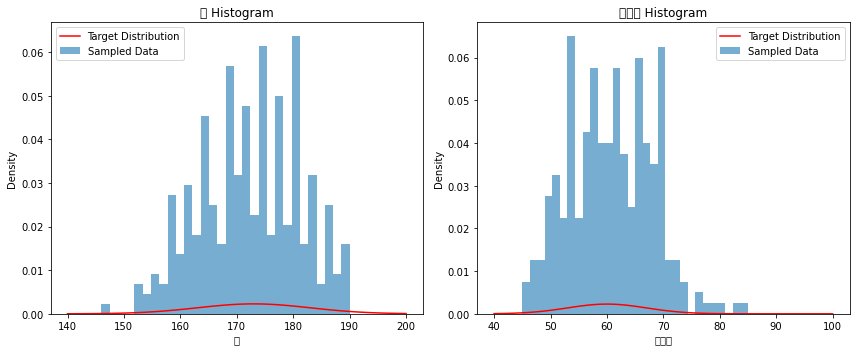

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

ht, wt = [],[]
for i in range(10000):
    ht.append(random.randint(140, 190))
    wt.append(random.randint(45, 90))

# 가상의 데이터프레임 생성 (예시를 위한 데이터)
data = {
    '키': ht,
    '몸무게': wt
}
df = pd.DataFrame(data)

# 목표 분포 (평균 173, 60인 정규분포)
def target_distribution(height, weight):
    prob_height = 1 / (10 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((height - 173) / 10)**2)
    prob_weight = 1 / (7 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((weight - 60) / 7)**2)
    return prob_height * prob_weight

# 제약 분포 (데이터에서 (키, 몸무게) 쌍을 랜덤하게 선택)
def proposal_distribution(df):
    idx = np.random.randint(0, len(df))
    height, weight = df.loc[idx, '키'], df.loc[idx, '몸무게']
    return height, weight

num_samples = 1000
samples = []
for _ in range(num_samples):
    height, weight = proposal_distribution(df)
    acceptance_prob = target_distribution(height, weight) / (0.5 * target_distribution(173, 60))
    if np.random.uniform(0, 1) < acceptance_prob:
        samples.append((height, weight))

# 샘플링된 데이터 시각화
samples_height = [sample[0] for sample in samples]
samples_weight = [sample[1] for sample in samples]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(samples_height, bins=30, density=True, alpha=0.6, label='Sampled Data')
plt.xlabel('키')
plt.ylabel('Density')
plt.title('키 Histogram')

x = np.linspace(140, 200, 100)
y_target_height = [target_distribution(height, 60) for height in x]
plt.plot(x, y_target_height, 'r', label='Target Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(samples_weight, bins=30, density=True, alpha=0.6, label='Sampled Data')
plt.xlabel('몸무게')
plt.ylabel('Density')
plt.title('몸무게 Histogram')

x = np.linspace(40, 100, 100)
y_target_weight = [target_distribution(173, weight) for weight in x]
plt.plot(x, y_target_weight, 'r', label='Target Distribution')
plt.legend()

plt.tight_layout()
plt.show()


/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/back

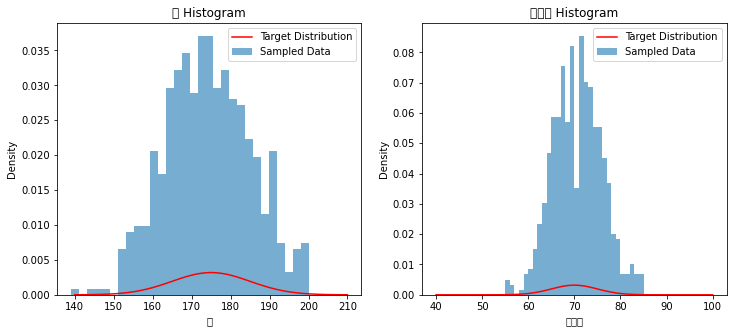

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 가상의 데이터프레임 생성 (예시를 위한 데이터)
ht, wt = [],[]
for i in range(10000):
    ht.append(random.randint(100, 200))
    wt.append(random.randint(40, 120))

# 가상의 데이터프레임 생성 (예시를 위한 데이터)
data = {
    '키': ht,
    '몸무게': wt
}
df = pd.DataFrame(data)

# 원하는 평균과 표준편차
desired_mean_height, desired_mean_weight = 175, 70
desired_std_height, desired_std_weight = 10, 5

# 목표 분포 (평균과 표준편차를 가지는 정규분포)
def target_distribution(height, weight):
    prob_height = 1 / (desired_std_height * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((height - desired_mean_height) / desired_std_height)**2)
    prob_weight = 1 / (desired_std_weight * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((weight - desired_mean_weight) / desired_std_weight)**2)
    return prob_height * prob_weight

# 제약 분포 (데이터에서 (키, 몸무게) 쌍을 랜덤하게 선택)
def proposal_distribution(df):
    idx = np.random.randint(0, len(df))
    height, weight = df.loc[idx, '키'], df.loc[idx, '몸무게']
    return height, weight

num_samples = 10000
samples = []
for _ in range(num_samples):
    height, weight = proposal_distribution(df)
    acceptance_prob = target_distribution(height, weight) / (0.5 * target_distribution(desired_mean_height, desired_mean_weight))
    if np.random.uniform(0, 1) < acceptance_prob:
        samples.append((height, weight))

# 샘플링된 데이터 시각화
samples_height = [sample[0] for sample in samples]
samples_weight = [sample[1] for sample in samples]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(samples_height, bins=30, density=True, alpha=0.6, label='Sampled Data')
plt.xlabel('키')
plt.ylabel('Density')
plt.title('키 Histogram')

x = np.linspace(140, 210, 100)
y_target_height = [target_distribution(height, 70) for height in x]
plt.plot(x, y_target_height, 'r', label='Target Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(samples_weight, bins=30, density=True, alpha=0.6, label='Sampled Data')
plt.xlabel('몸무게')
plt.ylabel('Density')
plt.title('몸무게 Histogram')

x = np.linspace(40, 100, 100)
y_target_weight = [target_distribution(175, weight) for weight in x]
plt.plot(x, y_target_weight, 'r', label='Target Distribution')
plt.legend()



In [40]:
df.mean()

키      149.8121
몸무게     79.6959
dtype: float64

In [41]:
np.mean(samples_height), np.std(samples_height)

(174.1892797319933, 10.629248496569126)

In [42]:
np.mean(samples_weight), np.std(samples_weight)

(70.1641541038526, 5.274049629444147)

In [43]:
len(samples)

597

/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [weight, height]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.se

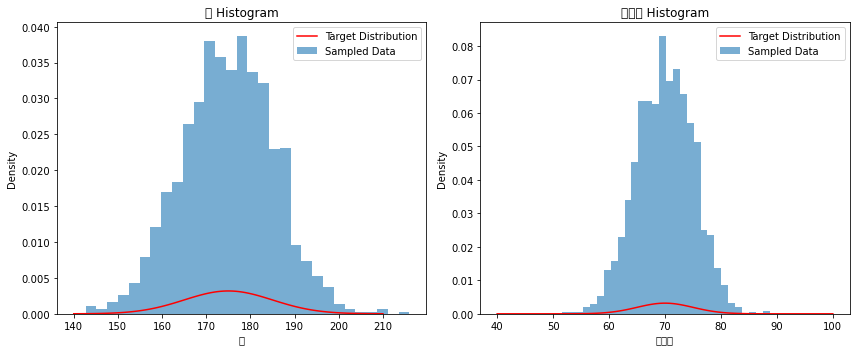

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

# 가상의 데이터프레임 생성 (예시를 위한 데이터)
data = {
    '키': [160, 170, 165, 175, 180, 155, 165, 172, 168, 178],
    '몸무게': [55, 70, 60, 80, 85, 50, 65, 68, 62, 75]
}
df = pd.DataFrame(data)

# 목표 분포 (평균 175, 70인 정규분포)
def target_distribution(height, weight):
    prob_height = 1 / (10 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((height - 175) / 10)**2)
    prob_weight = 1 / (5 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((weight - 70) / 5)**2)
    return prob_height * prob_weight

# MCMC를 활용하여 샘플링
with pm.Model() as model:
    height = pm.Normal('height', mu=175, sd=10)
    weight = pm.Normal('weight', mu=70, sd=5)
    likelihood = pm.Potential('likelihood', target_distribution(height, weight))
    trace = pm.sample(1000, tune=1000, cores=1)

samples_height = trace['height']
samples_weight = trace['weight']

# 샘플링된 데이터 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(samples_height, bins=30, density=True, alpha=0.6, label='Sampled Data')
plt.xlabel('키')
plt.ylabel('Density')
plt.title('키 Histogram')

x = np.linspace(140, 210, 100)
y_target_height = [target_distribution(height, 70) for height in x]
plt.plot(x, y_target_height, 'r', label='Target Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(samples_weight, bins=30, density=True, alpha=0.6, label='Sampled Data')
plt.xlabel('몸무게')
plt.ylabel('Density')
plt.title('몸무게 Histogram')

x = np.linspace(40, 100, 100)
y_target_weight = [target_distribution(175, weight) for weight in x]
plt.plot(x, y_target_weight, 'r', label='Target Distribution')
plt.legend()

plt.tight_layout()
plt.show()


In [51]:
samples_height.mean(), samples_height.std(), len(samples)

(174.9628780410077, 10.304919879773646, 597)

In [52]:
samples_weight.mean(), samples_weight.std(), len(samples)

(69.9743267794341, 5.03651008213323, 597)

/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [weight, height]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.se

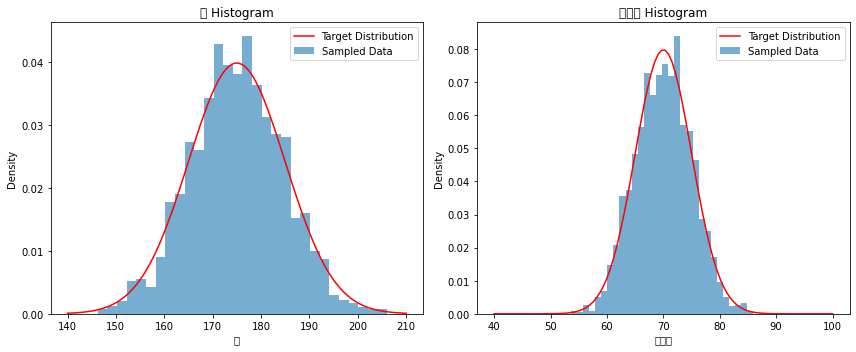

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

ht, wt = [],[]
for i in range(10000):
    ht.append(random.randint(100, 200))
    wt.append(random.randint(40, 120))

# 가상의 데이터프레임 생성 (예시를 위한 데이터)
data = {
    '키': ht,
    '몸무게': wt
}
df = pd.DataFrame(data)

# 목표 분포 (평균 175, 70인 정규분포)
def target_distribution(height, weight):
    prob_height = 1 / (10 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((height - 175) / 10)**2)
    prob_weight = 1 / (5 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((weight - 70) / 5)**2)
    return prob_height * prob_weight

# MCMC를 활용하여 샘플링
with pm.Model() as model:
    height = pm.Normal('height', mu=175, sd=10)
    weight = pm.Normal('weight', mu=70, sd=5)
    likelihood = pm.Potential('likelihood', target_distribution(height, weight))
    trace = pm.sample(1000, tune=1000, cores=1)

samples_height = trace['height']
samples_weight = trace['weight']

# 샘플링된 데이터 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(samples_height, bins=30, density=True, alpha=0.6, label='Sampled Data')
plt.xlabel('키')
plt.ylabel('Density')
plt.title('키 Histogram')

x = np.linspace(140, 210, 100)
y_target_height = [1 / (10 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((height - 175) / 10)**2) for height in x]
plt.plot(x, y_target_height, 'r', label='Target Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(samples_weight, bins=30, density=True, alpha=0.6, label='Sampled Data')
plt.xlabel('몸무게')
plt.ylabel('Density')
plt.title('몸무게 Histogram')

x = np.linspace(40, 100, 100)
y_target_weight = [1 / (5 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((weight - 70) / 5)**2) for weight in x]
plt.plot(x, y_target_weight, 'r', label='Target Distribution')
plt.legend()

plt.tight_layout()
plt.show()


In [57]:
df.mean()

키      150.0243
몸무게     80.3769
dtype: float64

In [60]:
samples_weight.mean(), samples_weight.mean()

(70.01972528294137, 70.01972528294137)